<a href="https://colab.research.google.com/github/markuzhehe/data101/blob/main/ClassificationMachineLearningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install pycaret package
!pip install --pre pycaret

!pip install --upgrade pycaret


In [ ]:
from google.colab import drive
# mount drive to import datasets
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/data101/archive/train.csv'

train_df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
#original test

from pycaret.classification import *

# load data
train_df = pd.read_csv(file_path)

# set up the PyCaret environment
s = setup(train_df, target='is_profit')

# create and tune a naive bayes model
nb = create_model('nb')
tuned_nb = tune_model(nb)

# evaluate the tuned model
evaluate_model(tuned_nb)

# make predictions on the test data using the tuned Naive Bayes model
predictions = predict_model(tuned_nb, data=train_df)

save_model(tuned_nb,'tuned_nb_model')


,Description,Value
0,Session id,7361
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 23)"
4,Transformed data shape,"(258729, 23)"
5,Transformed train set shape,"(181110, 23)"
6,Transformed test set shape,"(77619, 23)"
7,Numeric features,20
8,Categorical features,2
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6938,0.7550,0.4025,0.6540,0.4983,0.2955,0.3135
1,0.6895,0.7537,0.3969,0.6447,0.4913,0.2856,0.3030
2,0.6921,0.7498,0.4023,0.6493,0.4968,0.2922,0.3095
3,0.6910,0.7527,0.4068,0.6443,0.4987,0.2915,0.3076
4,0.6893,0.7485,0.3984,0.6435,0.4921,0.2857,0.3028
5,0.6844,0.7439,0.3903,0.6338,0.4831,0.2741,0.2908
6,0.6873,0.7463,0.3949,0.6395,0.4883,0.2808,0.2977
7,0.6927,0.7508,0.4001,0.6521,0.4959,0.2927,0.3107
8,0.6933,0.7562,0.4051,0.6513,0.4995,0.2953,0.3126


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6928,0.7558,0.3975,0.6537,0.4944,0.2921,0.3107
1,0.6915,0.7547,0.3972,0.6502,0.4932,0.2896,0.3078
2,0.6916,0.7507,0.3970,0.6505,0.4931,0.2896,0.3079
3,0.6916,0.7540,0.4039,0.6472,0.4974,0.2917,0.3086
4,0.6899,0.7490,0.3982,0.6451,0.4925,0.2867,0.3040
5,0.6833,0.7448,0.3843,0.6333,0.4784,0.2700,0.2874
6,0.6864,0.7477,0.3903,0.6393,0.4847,0.2778,0.2953
7,0.6937,0.7520,0.3987,0.6556,0.4958,0.2941,0.3129
8,0.6944,0.7571,0.4033,0.6554,0.4994,0.2970,0.3151


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6984,0.7751,0.4087,0.6639,0.5060,0.3062,0.3249


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['rsi14', 'sma9_var', 'sma180_var',
                                              'vwap_var', 'spread14_e',
                                              'volume14_34_var',
                                              'prev_close_var', 'prev_floor_var',
                                              'prev_ceil_var',
                                              'prev1_candle_score',
                                              'prev2_candle_score',
                                              'prev3_candle_score',
                                              'mins_from_start',
                                              'valley_interval_mins',
                                              'valley_close_s...
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['sym', '

In [ ]:
#first tuned data test; best preforming

from pycaret.classification import *

# load  data
train_df = pd.read_csv(file_path)

# set up the PyCaret environment
s = setup(train_df, target='is_profit', train_size=0.8)

# create a naive bayes model
nb = create_model('nb')
tuned_nb = tune_model(nb)

# evaluate tuned model
evaluate_model(tuned_nb)

# make predictions on the test data using the tuned model
predictions = predict_model(tuned_nb, data=train_df)



,Description,Value
0,Session id,1870
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 23)"
4,Transformed data shape,"(258729, 23)"
5,Transformed train set shape,"(206983, 23)"
6,Transformed test set shape,"(51746, 23)"
7,Numeric features,20
8,Categorical features,2
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6894,0.7478,0.3924,0.6465,0.4884,0.2840,0.3023
1,0.6946,0.7543,0.4148,0.6504,0.5065,0.3007,0.3167
2,0.6921,0.7518,0.4033,0.6488,0.4974,0.2925,0.3096
3,0.6929,0.7519,0.4059,0.6497,0.4996,0.2947,0.3117
4,0.6925,0.7512,0.3955,0.6538,0.4929,0.2909,0.3098
5,0.6877,0.7488,0.4001,0.6383,0.4919,0.2832,0.2993
6,0.6929,0.7508,0.4066,0.6494,0.5001,0.2950,0.3118
7,0.6935,0.7562,0.4060,0.6514,0.5002,0.2960,0.3132
8,0.6918,0.7559,0.3992,0.6501,0.4947,0.2907,0.3087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6927,0.7586,0.3482,0.6831,0.4613,0.2767,0.3075
1,0.6943,0.7626,0.3585,0.6816,0.4699,0.2831,0.3120
2,0.6927,0.7588,0.3503,0.6816,0.4628,0.2774,0.3076
3,0.6961,0.7642,0.3560,0.6893,0.4695,0.2857,0.3163
4,0.6991,0.7607,0.3529,0.7026,0.4699,0.2907,0.3243
5,0.6903,0.7535,0.3501,0.6732,0.4607,0.2726,0.3013
6,0.6956,0.7610,0.3527,0.6902,0.4668,0.2838,0.3151
7,0.6928,0.7639,0.3537,0.6794,0.4652,0.2786,0.3078
8,0.6928,0.7632,0.3477,0.6839,0.4610,0.2767,0.3077


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7116,0.7970,0.3831,0.7234,0.5009,0.3241,0.3565


,Description,Value
0,Session id,7515
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 10)"
4,Transformed data shape,"(309302, 10)"
5,Transformed train set shape,"(257556, 10)"
6,Transformed test set shape,"(51746, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6695,0.7294,0.6517,0.5532,0.5985,0.3209,0.3240
1,0.6722,0.7305,0.6543,0.5563,0.6013,0.3261,0.3292
2,0.6739,0.7296,0.6553,0.5583,0.6029,0.3293,0.3323
3,0.6745,0.7316,0.6526,0.5593,0.6023,0.3295,0.3323
4,0.6704,0.7272,0.6497,0.5545,0.5983,0.3218,0.3247
5,0.6765,0.7331,0.6540,0.5617,0.6043,0.3334,0.3361
6,0.6767,0.7335,0.6639,0.5610,0.6081,0.3363,0.3398
7,0.6739,0.7291,0.6535,0.5585,0.6022,0.3288,0.3317
8,0.6716,0.7296,0.6541,0.5555,0.6008,0.3250,0.3281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6717,0.7384,0.6936,0.5522,0.6148,0.3351,0.3417
1,0.6734,0.7392,0.6909,0.5544,0.6152,0.3374,0.3436
2,0.6693,0.7373,0.6931,0.5495,0.6130,0.3310,0.3378
3,0.6721,0.7394,0.6996,0.5522,0.6172,0.3373,0.3446
4,0.6707,0.7374,0.6894,0.5514,0.6127,0.3325,0.3388
Mean,0.6715,0.7384,0.6933,0.5519,0.6146,0.3347,0.3413
Std,0.0014,0.0009,0.0035,0.0016,0.0016,0.0026,0.0026


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


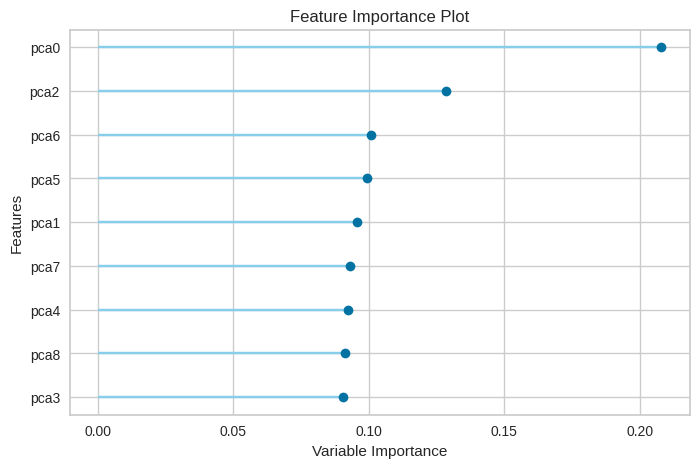

AttributeError: ignored

In [ ]:
import pandas as pd
from pycaret.classification import *

# load data
file_path = '/content/drive/My Drive/Colab Notebooks/data101/archive/train.csv'
train_df = pd.read_csv(file_path)
columns_to_remove = ['sym', 'datetime','prev_close_var', 'prev_floor_var', 'prev_ceil_var', 'day_open_var', 'open_from_prev_close_var', 'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score','valley_interval_mins', 'valley_close_score', 'valley_rsi_score']
train_df_filtered = train_df.drop(columns=columns_to_remove, axis=1)


# set up the PyCaret environment with the filtered data
s = setup(train_df_filtered, target='is_profit', train_size=0.8, normalize=True, pca=True, fix_imbalance=True, fix_imbalance_method='SMOTE')

# create a RandomForest model
rf = create_model('rf', fold=10)
tuned_rf = tune_model(rf, fold=5)

# feature selection with RandomForest
plot_model(tuned_rf, plot='feature')


In [ ]:
#final test

import pandas as pd
from pycaret.classification import *

# Load your data
file_path = '/content/drive/My Drive/Colab Notebooks/data101/archive/train.csv'
train_df = pd.read_csv(file_path)
columns_to_remove = ['sym', 'datetime','prev_close_var', 'prev_floor_var', 'prev_ceil_var', 'day_open_var', 'open_from_prev_close_var', 'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score','valley_interval_mins', 'valley_close_score', 'valley_rsi_score']
train_df_filtered = train_df.drop(columns=columns_to_remove, axis=1)

# Set up the PyCaret environment with PCA enabled
s = setup(train_df_filtered, target='is_profit', train_size=0.8, normalize=True, pca=True, fix_imbalance=True, fix_imbalance_method='SMOTE')

# Use the transformed features from PyCaret's setup
s_selected = setup(data=train_df_filtered, target='is_profit', train_size=0.8)
tuned_rf_selected_features = tune_model(create_model('rf', fold=10), fold=5)
evaluate_model(tuned_rf_selected_features)


,Description,Value
0,Session id,1769
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 10)"
4,Transformed data shape,"(309302, 10)"
5,Transformed train set shape,"(257556, 10)"
6,Transformed test set shape,"(51746, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,3570
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 10)"
4,Transformed data shape,"(258729, 10)"
5,Transformed train set shape,"(206983, 10)"
6,Transformed test set shape,"(51746, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6920,0.7363,0.4781,0.6198,0.5398,0.3140,0.3200
1,0.6922,0.7374,0.4790,0.6199,0.5404,0.3146,0.3206
2,0.6927,0.7350,0.4735,0.6229,0.5380,0.3142,0.3208
3,0.6890,0.7339,0.4786,0.6133,0.5377,0.3087,0.3141
4,0.6863,0.7269,0.4688,0.6105,0.5303,0.3009,0.3068
5,0.6906,0.7330,0.4767,0.6173,0.5380,0.3112,0.3171
6,0.6939,0.7359,0.4853,0.6216,0.5451,0.3197,0.3253
7,0.6893,0.7294,0.4801,0.6136,0.5387,0.3097,0.3150
8,0.6904,0.7348,0.4819,0.6152,0.5405,0.3121,0.3174


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6936,0.7364,0.4472,0.6341,0.5245,0.3083,0.3186
1,0.6907,0.7343,0.4268,0.6348,0.5105,0.2968,0.3093
2,0.6892,0.7301,0.4255,0.6317,0.5085,0.2937,0.3060
3,0.6880,0.7303,0.4224,0.6300,0.5057,0.2905,0.3029
4,0.6922,0.7316,0.4423,0.6326,0.5206,0.3043,0.3148
Mean,0.6908,0.7326,0.4328,0.6327,0.5140,0.2987,0.3103
Std,0.0020,0.0024,0.0099,0.0017,0.0073,0.0066,0.0057


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Set up the PyCaret environment with the original unfiltered data for Naive Bayes
train_df_filtered = train_df  # Replace desired_columns with your selection criteria

s_nb = setup(train_df_filtered, target='is_profit', train_size=0.8, normalize=True, pca=True, fix_imbalance=True, fix_imbalance_method='SMOTE')
nb = create_model('nb', fold=10)
tuned_nb = tune_model(nb, fold=5)

,Description,Value
0,Session id,329
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 23)"
4,Transformed data shape,"(309302, 23)"
5,Transformed train set shape,"(257556, 23)"
6,Transformed test set shape,"(51746, 23)"
7,Numeric features,20
8,Categorical features,2
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6931,0.7431,0.4590,0.6286,0.5306,0.3108,0.3193
1,0.6890,0.7351,0.4466,0.6234,0.5204,0.2994,0.3086
2,0.6910,0.7384,0.4427,0.6297,0.5199,0.3022,0.3124
3,0.6903,0.7365,0.4524,0.6244,0.5247,0.3036,0.3123
4,0.6862,0.7357,0.4395,0.6193,0.5141,0.2921,0.3015
5,0.6918,0.7381,0.4543,0.6272,0.5270,0.3070,0.3157
6,0.6878,0.7332,0.4462,0.6209,0.5192,0.2972,0.3061
7,0.6861,0.7342,0.4440,0.6177,0.5166,0.2933,0.3021
8,0.6856,0.7321,0.4447,0.6164,0.5167,0.2927,0.3012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6929,0.7450,0.4452,0.6331,0.5228,0.3064,0.3167
1,0.6932,0.7424,0.4405,0.6357,0.5204,0.3056,0.3167
2,0.6935,0.7423,0.4446,0.6348,0.5230,0.3074,0.3180
3,0.6902,0.7388,0.4413,0.6283,0.5184,0.3003,0.3104
4,0.6911,0.7422,0.4445,0.6292,0.5210,0.3029,0.3128
Mean,0.6922,0.7421,0.4432,0.6322,0.5211,0.3045,0.3149
Std,0.0013,0.0020,0.0019,0.0030,0.0017,0.0026,0.0028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Set up the PyCaret environment with the original unfiltered data for Naive Bayes
columns_to_remove = [ 'sym','datetime','rsi14','volume14_34_var','prev_close_var','prev_floor_var','prev_ceil_var','prev1_candle_score','prev2_candle_score','prev3_candle_score','mins_from_start','valley_interval_mins','valley_close_score','valley_rsi_score','day_open_var','open_from_prev_close_var','floor_var']
train_df_filtered = train_df.drop(columns=columns_to_remove, axis=1)

s_nb = setup(train_df_filtered, target='is_profit', train_size=0.95, normalize=True, pca=True, fix_imbalance=True, fix_imbalance_method='SMOTE')
nb = create_model('nb', fold=10)
tuned_nb = tune_model(nb, fold=5)

# Evaluate the tuned model
evaluate_model(tuned_nb)

# Make predictions on the test data using the tuned Naive Bayes model
predictions = predict_model(tuned_nb, data=train_df)

,Description,Value
0,Session id,3548
1,Target,is_profit
2,Target type,Binary
3,Original data shape,"(258729, 6)"
4,Transformed data shape,"(318785, 6)"
5,Transformed train set shape,"(305848, 6)"
6,Transformed test set shape,"(12937, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6793,0.7117,0.4076,0.6138,0.4898,0.2696,0.2816
1,0.6809,0.7160,0.4044,0.6189,0.4892,0.2717,0.2847
2,0.6818,0.7159,0.4107,0.6190,0.4938,0.2754,0.2877
3,0.6754,0.7097,0.4019,0.6061,0.4833,0.2606,0.2723
4,0.6854,0.7185,0.4119,0.6276,0.4973,0.2825,0.2958
5,0.6811,0.7156,0.4136,0.6162,0.4950,0.2749,0.2866
6,0.6793,0.7092,0.4134,0.6120,0.4934,0.2715,0.2827
7,0.6799,0.7122,0.4041,0.6167,0.4883,0.2698,0.2826
8,0.6790,0.7115,0.4127,0.6115,0.4928,0.2708,0.2820


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6809,0.7161,0.3841,0.6268,0.4763,0.2654,0.2818
1,0.6798,0.7152,0.3866,0.6228,0.4771,0.2641,0.2797
2,0.6843,0.7195,0.3918,0.6329,0.4840,0.2743,0.2907
3,0.6799,0.7132,0.3859,0.6234,0.4767,0.2641,0.2799
4,0.6815,0.7137,0.3917,0.6254,0.4817,0.2690,0.2843
Mean,0.6813,0.7155,0.3880,0.6263,0.4792,0.2674,0.2833
Std,0.0017,0.0022,0.0031,0.0036,0.0031,0.0039,0.0041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6815,0.7157,0.3881,0.6267,0.4794,0.2677,0.2837


In [ ]:
#this doesn't count I just wanted to test it, it cross references 10 different techniques and see what gets a higher accuracy
from pycaret.classification import *

s = setup(train_df_filtered, target='is_profit', train_size=0.95, normalize=True, pca=True, fix_imbalance=True, fix_imbalance_method='SMOTE')

best = compare_models()

print(best)

finalize_model(best)

evaluate_model(best)

predict_model(best)

ModuleNotFoundError: ignored